# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [64]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [66]:
#product_category_3은 너무 결측치가 많음

df.drop(columns=['Product_Category_3'],inplace=True)

In [67]:

df[['Product_Category_1','Product_Category_2']].head(20)

,Product_Category_1,Product_Category_2
0,5,17.0
1,7,NaN
2,1,4.0
3,2,4.0
4,3,5.0
5,8,NaN
6,2,4.0
7,5,15.0
8,16,NaN
9,5,8.0


In [68]:
df['Product_Category_2'].unique()

array([17., nan,  4.,  5., 15.,  8., 12., 11.,  2., 14.,  3., 18., 16.,
        6., 13., 10.,  9.,  7.])

In [55]:
df['Product_Category_1'].unique()

array([ 5,  7,  1,  2,  3,  8, 16, 14, 10, 19, 11, 12,  4, 17, 15,  6, 13,
       20, 18,  9], dtype=int64)

In [103]:
tmp = df[df['Product_Category_1']==16][['Product_Category_2']].value_counts().to_frame()
if len(tmp)>0:
    tmp.idxmax()[0][0]

In [70]:
for i in df['Product_Category_1'].unique():
    print(i)
    print([df[df['Product_Category_1']==i][['Product_Category_2']].value_counts()][0])
    print("*"*20)

5
Product_Category_2
8.0                   307
14.0                  253
6.0                    61
11.0                   54
15.0                   43
9.0                    38
12.0                   19
17.0                   19
13.0                   16
16.0                    9
18.0                    8
7.0                     7
dtype: int64
********************
7
Product_Category_2
17.0                  2
12.0                  1
dtype: int64
********************
1
Product_Category_2
2.0                   448
15.0                  169
16.0                  147
8.0                   132
5.0                   107
6.0                    84
14.0                   44
11.0                   43
17.0                   21
18.0                   11
4.0                    10
13.0                   10
3.0                     2
dtype: int64
********************
2
Product_Category_2
4.0                   86
5.0                   43
3.0                   33
8.0                   19
9.0             

#### 결측치 그냥 대분류 -> 중분류 할 때 매칭 가장 많은 것으로 함

In [88]:
idx = df[(df['Product_Category_1']==7) & (df['Product_Category_2'].isna())].index
idx

Int64Index([   1,   66,  183,  352,  599,  768, 1204, 1240, 1548, 1733, 1750,
            1860, 2045, 2087, 2114, 2326, 2546, 2602, 2624, 2944, 3083, 3159,
            3217, 3248, 3253, 3273, 3275, 3331, 3402, 3457, 3789, 4011, 4224,
            4386, 4697, 4712, 4760],
           dtype='int64')

In [93]:
len(idx)

57

In [104]:
for i in df['Product_Category_1'].unique():
    idx = df[(df['Product_Category_1']==i) & (df['Product_Category_2'].isna())].index
    if len(idx)>0:
        #print(df[df['Product_Category_1']==i][['Product_Category_2']].value_counts().to_frame().idxmax()[0][0])
        tmp = df[df['Product_Category_1']==i][['Product_Category_2']].value_counts().to_frame()
        if len(tmp)>0:
            df.loc[idx, 'Product_Category_2'] = tmp.idxmax()[0][0]

In [105]:
idx = df[df['Product_Category_1']==7 & df['Product_Category_2'].isna()]['Product_Category_2'].index
idx

Int64Index([], dtype='int64')

In [106]:
df[['Product_Category_1','Product_Category_2']].head(20)

,Product_Category_1,Product_Category_2
0,5,17.0
1,7,8.0
2,1,4.0
3,2,4.0
4,3,5.0
5,8,14.0
6,2,4.0
7,5,15.0
8,16,NaN
9,5,8.0


#### 몇몇 카테고리는 아래와 같이 매치가 안됨
20
Series([], dtype: int64)
********************
18
Series([], dtype: int64)
********************
9
Series([], dtype: int64)
********************
#### 매치되는 카테고리는 아래처럼 뜸
********************
#### 13
#### Product_Category_2
#### 16.0        |          24
#### 15.0        |           7
#### 14.0        |           2
#### dtype: int64
********************

In [108]:
df.info() # 약 150개 결측치

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          4844 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 597.6+ KB


In [117]:
for i in df['Product_Category_1'].unique():
    if len([df[df['Product_Category_1']==i][['Product_Category_2']].value_counts()][0])==0:
        print(i)

16
19
17
20
18
9


#### 카테고리2가 null값으로만 채워진 카테고리 1 내역

In [118]:
df['Product_Category_2'].mean()

10.106523534269199

In [119]:
df['Product_Category_2'].median()

9.0

In [121]:
df['Product_Category_2'].value_counts()

8.0     1208
14.0    1045
16.0     535
2.0      505
15.0     345
5.0      260
4.0      254
6.0      148
17.0     132
11.0     110
13.0     102
9.0       65
12.0      40
3.0       35
10.0      30
18.0      23
7.0        7
Name: Product_Category_2, dtype: int64

#### mean이나 median으로 하기엔 그 값이 너무 적어서 그냥 8로 함

In [123]:
df.fillna(8, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          4998 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 597.6+ KB


In [125]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,8.0,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780


In [126]:
df.nunique()

User_ID                       2656
Product_ID                    1797
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              20
Product_Category_2              17
Purchase                      3736
dtype: int64

In [129]:
# user_id이 너무 많아 drop
df.drop(columns=['User_ID'],inplace=True)

In [140]:
tmp = df['Product_ID'].apply(lambda x : x[:5])
tmp.nunique()

44

In [139]:
tmp = df['Product_ID'].apply(lambda x : x[:4])
tmp.nunique()

5

In [158]:
# product id는 p00x 로 잘라서 5가지로 만듦
df['Product_ID'] = df['Product_ID'].apply(lambda x: x[:4])

In [159]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P000,F,0-17,10,A,3,0,5,17.0,2010
1,P003,F,0-17,10,A,1,0,7,8.0,4483
2,P000,F,0-17,10,A,1,0,1,4.0,7696
3,P001,F,0-17,10,A,3,0,2,4.0,16429
4,P001,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P001,M,55+,7,C,1,1,1,16.0,11701
4994,P003,M,55+,1,C,1,1,8,14.0,2045
4995,P001,M,55+,13,C,3,1,1,6.0,4505
4996,P003,M,55+,0,C,2,1,12,14.0,1413


In [160]:
from sklearn.preprocessing import OneHotEncoder
en = ['Product_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']

encoder = OneHotEncoder().fit(df[en]) 
encoder.get_feature_names(en)

C:\Users\lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Product_ID_P000', 'Product_ID_P001', 'Product_ID_P002',
       'Product_ID_P003', 'Product_ID_P009', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5',
   

In [161]:
endcoded = pd.DataFrame(encoder.transform(df[en]).toarray(),
                               index = df.index,
                               columns = encoder.get_feature_names(en))

C:\Users\lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [162]:
endcoded.columns

Index(['Product_ID_P000', 'Product_ID_P001', 'Product_ID_P002',
       'Product_ID_P003', 'Product_ID_P009', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_C

In [164]:
res = pd.concat([df, endcoded], axis=1).drop(columns=en)

In [166]:
res.columns

Index(['Marital_Status', 'Purchase', 'Product_ID_P000', 'Product_ID_P001',
       'Product_ID_P002', 'Product_ID_P003', 'Product_ID_P009', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Pro

In [167]:
res

,Marital_Status,Purchase,Product_ID_P000,Product_ID_P001,Product_ID_P002,Product_ID_P003,Product_ID_P009,Gender_F,Gender_M,Age_0-17,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0,2010,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,4483,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,7696,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,16429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,5780,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4994,1,2045,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4995,1,4505,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,1,1413,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### purchase 예측을 문제로 삼을 것임

In [168]:
X = res.drop(columns=['Purchase'])
y = res['Purchase']

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
print(X_train.shape)
print(X_test.shape)

(3748, 81)
(1250, 81)


In [171]:
from sklearn.neighbors import KNeighborsRegressor
train_accuracy = []
test_accuracy = []

for k in range(1,20):
    reg = KNeighborsRegressor(n_neighbors = k)    
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))  
    test_accuracy.append(reg.score(X_test, y_test))  

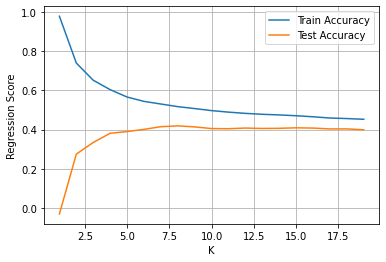

In [174]:
import matplotlib.pyplot as plt
x = [i for i in range(1,20)]
plt.plot(x, train_accuracy, label = "Train Accuracy")
plt.plot(x, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Score")
plt.grid()
plt.legend()
plt.show()

#### k=8 부근에서 test accuracy 가장 높음
#### 가까운 인스턴스 8개를 고려해서 purchase 예측하기